In [1]:
from simulate_returns import * 
import numpy as np
import matplotlib.pyplot as plt
import math
from helper_growth import * 

In [2]:
with open('all_returns_moderate.npy', 'rb') as f:
    all_returns = np.load(f)
with open('all_market_time_moderate.npy', 'rb') as f:
    all_market_time = np.load(f)
with open('all_market_sentiment_moderate.npy', 'rb') as f:
    all_market_sentiment = np.load(f)
with open('all_b_value_moderate.npy', 'rb') as f:
    all_b_value = np.load(f)
with open('all_r_t_moderate.npy', 'rb') as f:
    all_r_t = np.load(f)
with open('all_default_prob_moderate.npy', 'rb') as f:
    all_default = np.load(f)

    

In [3]:
### Here we make 10.000 simulations of our returns and then make simple statistics out of them:
i = 0
N=10000
T = 24*365*5
all_growth = np.zeros((N, T))
all_usage = np.zeros((N, T))

index_growth, index_sim, price = simulate_index(N=N)

while i<N:
    all_usage[i] = usage_sim(sigma_usage=1)
    #market_time,market_sentiment,b_value,r_t,default_prob,returns = sim_returns(starting_b_value = 0.03,low_bound_b = 0.03,upper_bound_b = 0.05,ltr_vol_std = 0.1, probability_of_default = 0.02, ltr_default_prob = 0.005 , starting_staking_rate = 0.03, r_t_sigma = 0.025 , sigma_market_time = 2 , max_prob = 0.4)
    all_growth[i] = network_growth(all_market_sentiment[i],all_r_t[i], deposit_rate = all_r_t[i], CAR  = 0.98,usage_growth = all_usage[i], stakers_share = np.zeros(int(T*10)) + .15,index_appreciation = index_growth[i])
    
    if i%100==0:
        print(100* (i/N),"% done")
    i+=1

0.0 % done
1.0 % done
2.0 % done
3.0 % done
4.0 % done
5.0 % done
6.0 % done
7.000000000000001 % done
8.0 % done
9.0 % done
10.0 % done
11.0 % done
12.0 % done
13.0 % done
14.000000000000002 % done
15.0 % done
16.0 % done
17.0 % done
18.0 % done
19.0 % done
20.0 % done
21.0 % done
22.0 % done
23.0 % done
24.0 % done
25.0 % done
26.0 % done
27.0 % done
28.000000000000004 % done
28.999999999999996 % done
30.0 % done
31.0 % done
32.0 % done
33.0 % done
34.0 % done
35.0 % done
36.0 % done
37.0 % done
38.0 % done
39.0 % done
40.0 % done
41.0 % done
42.0 % done
43.0 % done
44.0 % done
45.0 % done
46.0 % done
47.0 % done
48.0 % done
49.0 % done
50.0 % done
51.0 % done
52.0 % done
53.0 % done
54.0 % done
55.00000000000001 % done
56.00000000000001 % done
56.99999999999999 % done
57.99999999999999 % done
59.0 % done
60.0 % done
61.0 % done
62.0 % done
63.0 % done
64.0 % done
65.0 % done
66.0 % done
67.0 % done
68.0 % done
69.0 % done
70.0 % done
71.0 % done
72.0 % done
73.0 % done
74.0 % done
75

In [5]:
### Analysis of the results;
t = 0
growth_avg = np.zeros(T)
growth_upper = np.zeros(T)
growth_lower = np.zeros(T)
growth_max = np.zeros(T)
growth_min = np.zeros(T)

hype_avg = np.zeros(T)
hype_upper = np.zeros(T)
hype_lower = np.zeros(T)
hype_max = np.zeros(T)
hype_min = np.zeros(T)

while t<T:
    growth_avg[t] = np.mean(all_growth[:,t])
    growth_upper[t] = np.sort(all_growth[:,t])[int(round(0.975 * N,0))]
    growth_lower[t] = np.sort(all_growth[:,t])[int(round(0.025 * N,0))]
    growth_max[t] = max(all_growth[:,t])
    growth_min[t] = min(all_growth[:,t])

    hype_avg[t] = np.mean(all_usage[:,t])
    hype_upper[t] = np.sort(all_usage[:,t])[int(round(0.975 * N,0))]
    hype_lower[t] = np.sort(all_usage[:,t])[int(round(0.025 * N,0))]
    hype_max[t] = max(all_usage[:,t])
    hype_min[t] = min(all_usage[:,t])
    
    if t%1000==0:
        print(t/T)
    
    t+=1

0.0
0.0228310502283105
0.045662100456621
0.0684931506849315
0.091324200913242
0.1141552511415525
0.136986301369863
0.1598173515981735
0.182648401826484
0.2054794520547945
0.228310502283105
0.2511415525114155
0.273972602739726
0.2968036529680365
0.319634703196347
0.3424657534246575
0.365296803652968
0.3881278538812785
0.410958904109589
0.4337899543378995
0.45662100456621
0.4794520547945205
0.502283105022831
0.5251141552511416
0.547945205479452
0.5707762557077626
0.593607305936073
0.6164383561643836
0.639269406392694
0.6621004566210046
0.684931506849315
0.7077625570776256
0.730593607305936
0.7534246575342466
0.776255707762557
0.7990867579908676
0.821917808219178
0.8447488584474886
0.867579908675799
0.8904109589041096
0.91324200913242
0.9360730593607306
0.958904109589041
0.9817351598173516


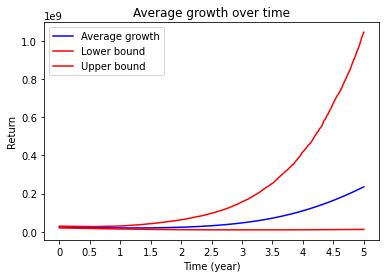

In [14]:

# Define data values
x = range(0,T)


# Plot a simple line chart
plt.plot(x, growth_avg,color ="b")
# Plot lower confidence interval
plt.plot(x, growth_lower,color ="r")
# Plot upper confidence interval
plt.plot(x, growth_upper,color ="r")
plt.legend(["Average growth","Lower bound","Upper bound"],loc = "upper left")
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
# naming the x axis
plt.xlabel("Time (year)")
plt.ylabel("Return")
plt.title("Average growth over time")
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
plt.xticks(x,labels)
# naming the y axis
plt.show()


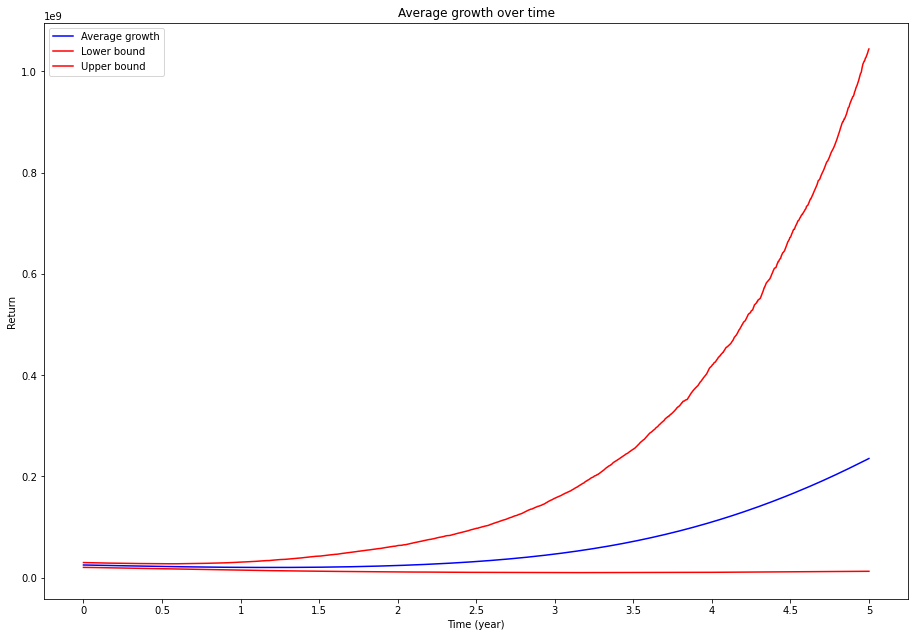

In [15]:

# Define data values
x = range(0,T)

fig = plt.figure()
# naming the title of the plot

ax1 = fig.add_axes([0, 0, 2, 2])

# Plot a simple line chart
ax1.plot(x, growth_avg,color ="b")
#plt.plot(x, growth_avg,color ="b")
# Plot lower confidence interval
ax1.plot(x, growth_lower,color ="r")
ax1.plot(x, growth_upper,color ="r")

plt.legend(["Average growth","Lower bound","Upper bound"],loc = "upper left")
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
# naming the x axis
plt.xlabel("Time (year)")
plt.ylabel("Return")
plt.title("Average growth over time")
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
plt.xticks(x,labels)
# naming the y axis
plt.show()


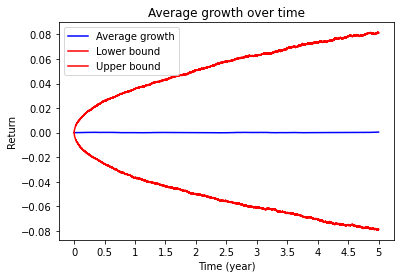

In [16]:

# Define data values
x = range(0,T)


# Plot a simple line chart
plt.plot(x, hype_avg,color ="b")

# Plot lower confidence interval
plt.plot(x, hype_lower,color ="r")
# Plot upper confidence interval
plt.plot(x, hype_upper,color ="r")
plt.legend(["Average growth","Lower bound","Upper bound"],loc = "upper left")
labels = [0,.5, 1, 1.5, 2, 2.5, 3,3.5,4,4.5,5]
# naming the x axis
plt.xlabel("Time (year)")
plt.ylabel("Return")
plt.title("Average growth over time")
x = [0,T/10, T/5, (3/10)*T, (4/10)*T,(5/10)*T,(6/10)*T,(7/10)*T,(8/10)*T,(9/10)*T,T]
plt.xticks(x,labels)
# naming the y axis
plt.show()


In [9]:
growth_avg

array([2.49859723e+07, 2.49846902e+07, 2.49840805e+07, ...,
       2.35278324e+08, 2.35296466e+08, 2.35314535e+08])

In [17]:
growth_lower

array([20245214.48510834, 20244004.40340669, 20244129.3048477 , ...,
       12548203.69096377, 12548469.41571479, 12548860.20209939])

In [ ]:
with open('all_growth.npy', 'wb') as f:
    np.save(f, all_growth)
with open('all_hype.npy', 'wb') as f:
    np.save(f, all_usage)